# PROJECT BACKGROUND

**NAME: Brian Luzano**

CLASS: TIM-8535 UNIVARIATE ANALYSIS

The purpose of this assignment is to demonstrate multiple linear regression to determine the extent of linear relationship between independent variables of Region, Temperature (Temp), Relative Humidity (RH), Wind Speed (WS), Rain, Fine Fuel Moisture Code (FFMC), Duff Moisture Code (DMC), Drought Code (DC), Initial Speed Index (ISI), & Buildup Index (BUI) and a dependent variable of Fire Weather Index (FWI).

**Problem:** The Algerian government needs to determine what factors contribute to the FWI. This will help predict FWI.

**Research question:** Does a linear relationship exist between the predictors (Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, Region) and FWI?



# IMPORT LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")


# IMPORT DATA

In [3]:
# Read in the provided data.
df = pd.read_csv('Algerian_forest_fires.csv')

# DATA EXPLORATION

In [4]:
# Display the head of the data.
df.head()

,Region,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Sidi-Bel Abbes,30,6,2012,34,42,15,1.7,79.7,12.0,8.5,2.2,11.5,2.2,not fire
1,Sidi-Bel Abbes,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire
2,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
3,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
4,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [5]:
# Display the tail of the data.
df.tail()

,Region,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,Bejaia,23,8,2012,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,fire
240,Bejaia,25,8,2012,35,60,15,0.0,88.9,43.9,181.3,8.2,54.7,20.3,fire
241,Bejaia,27,8,2012,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,fire
242,Bejaia,20,9,2012,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire
243,Sidi-Bel Abbes,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,9.0,12.5,10.4,fire


In [6]:
# Check the data types of the variables and check for null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5   RH           244 non-null    int64  
 6   WS           244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
 14  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [7]:
# Convert Day, Month, and Year to object (categorical)
convert_dict = {'day':object,'month':object,'year':object}
df=df.astype(convert_dict)
print(df.dtypes)

Region          object
day             object
month           object
year            object
Temperature      int64
RH               int64
WS               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object


In [8]:
# Run five-number summary of the numerical variables.
df.describe()

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [9]:
# Drop day, month, year from df as they won't be used in the regression.
df1=df.drop(['day','month','year'], axis=1)
df1

,Region,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Sidi-Bel Abbes,34,42,15,1.7,79.7,12.0,8.5,2.2,11.5,2.2,not fire
1,Sidi-Bel Abbes,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire
2,Bejaia,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
3,Bejaia,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
4,Bejaia,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...
239,Bejaia,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,fire
240,Bejaia,35,60,15,0.0,88.9,43.9,181.3,8.2,54.7,20.3,fire
241,Bejaia,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,fire
242,Bejaia,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire


# One-Hot Encoding Region
Region is a categorical variable that needs to be one-hot encoded into a dummy numeric variable for use in linear regression.

In [10]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [11]:
# Perform one-hot encoding on Region variable to convert it to a dummy numeric variable.
encoder_df = pd.DataFrame(encoder.fit_transform(df1[['Region']]).toarray())
                          
# Merge one-hot encoded column back to df1
final_df = df1.join(encoder_df)

In [12]:
final_df

,Region,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,0,1
0,Sidi-Bel Abbes,34,42,15,1.7,79.7,12.0,8.5,2.2,11.5,2.2,not fire,0.0,1.0
1,Sidi-Bel Abbes,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,0.0,1.0
2,Bejaia,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0,0.0
3,Bejaia,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0,0.0
4,Bejaia,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Bejaia,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,fire,1.0,0.0
240,Bejaia,35,60,15,0.0,88.9,43.9,181.3,8.2,54.7,20.3,fire,1.0,0.0
241,Bejaia,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,fire,1.0,0.0
242,Bejaia,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire,1.0,0.0


In [13]:
# Drop the original Region variable since it was one-hot encoded and drop the 1 variable as a
# 0 under the 0 variable is the Sidi-Bel Abbes Region.
final_df=final_df.drop(['Region',1], axis=1)
final_df

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,0
0,34,42,15,1.7,79.7,12.0,8.5,2.2,11.5,2.2,not fire,0.0
1,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,0.0
2,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
3,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
4,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,fire,1.0
240,35,60,15,0.0,88.9,43.9,181.3,8.2,54.7,20.3,fire,1.0
241,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,fire,1.0
242,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire,1.0


In [14]:
# Change the name of the 0 column to Bejaia
final_df=final_df.rename(columns = {0: "Bejaia"})
final_df

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Bejaia
0,34,42,15,1.7,79.7,12.0,8.5,2.2,11.5,2.2,not fire,0.0
1,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,0.0
2,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
3,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
4,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,fire,1.0
240,35,60,15,0.0,88.9,43.9,181.3,8.2,54.7,20.3,fire,1.0
241,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,fire,1.0
242,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire,1.0


In [15]:
final_df.describe()

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Bejaia
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Investigate correlation and multicollinearity.

In [16]:
from pandas.plotting import scatter_matrix

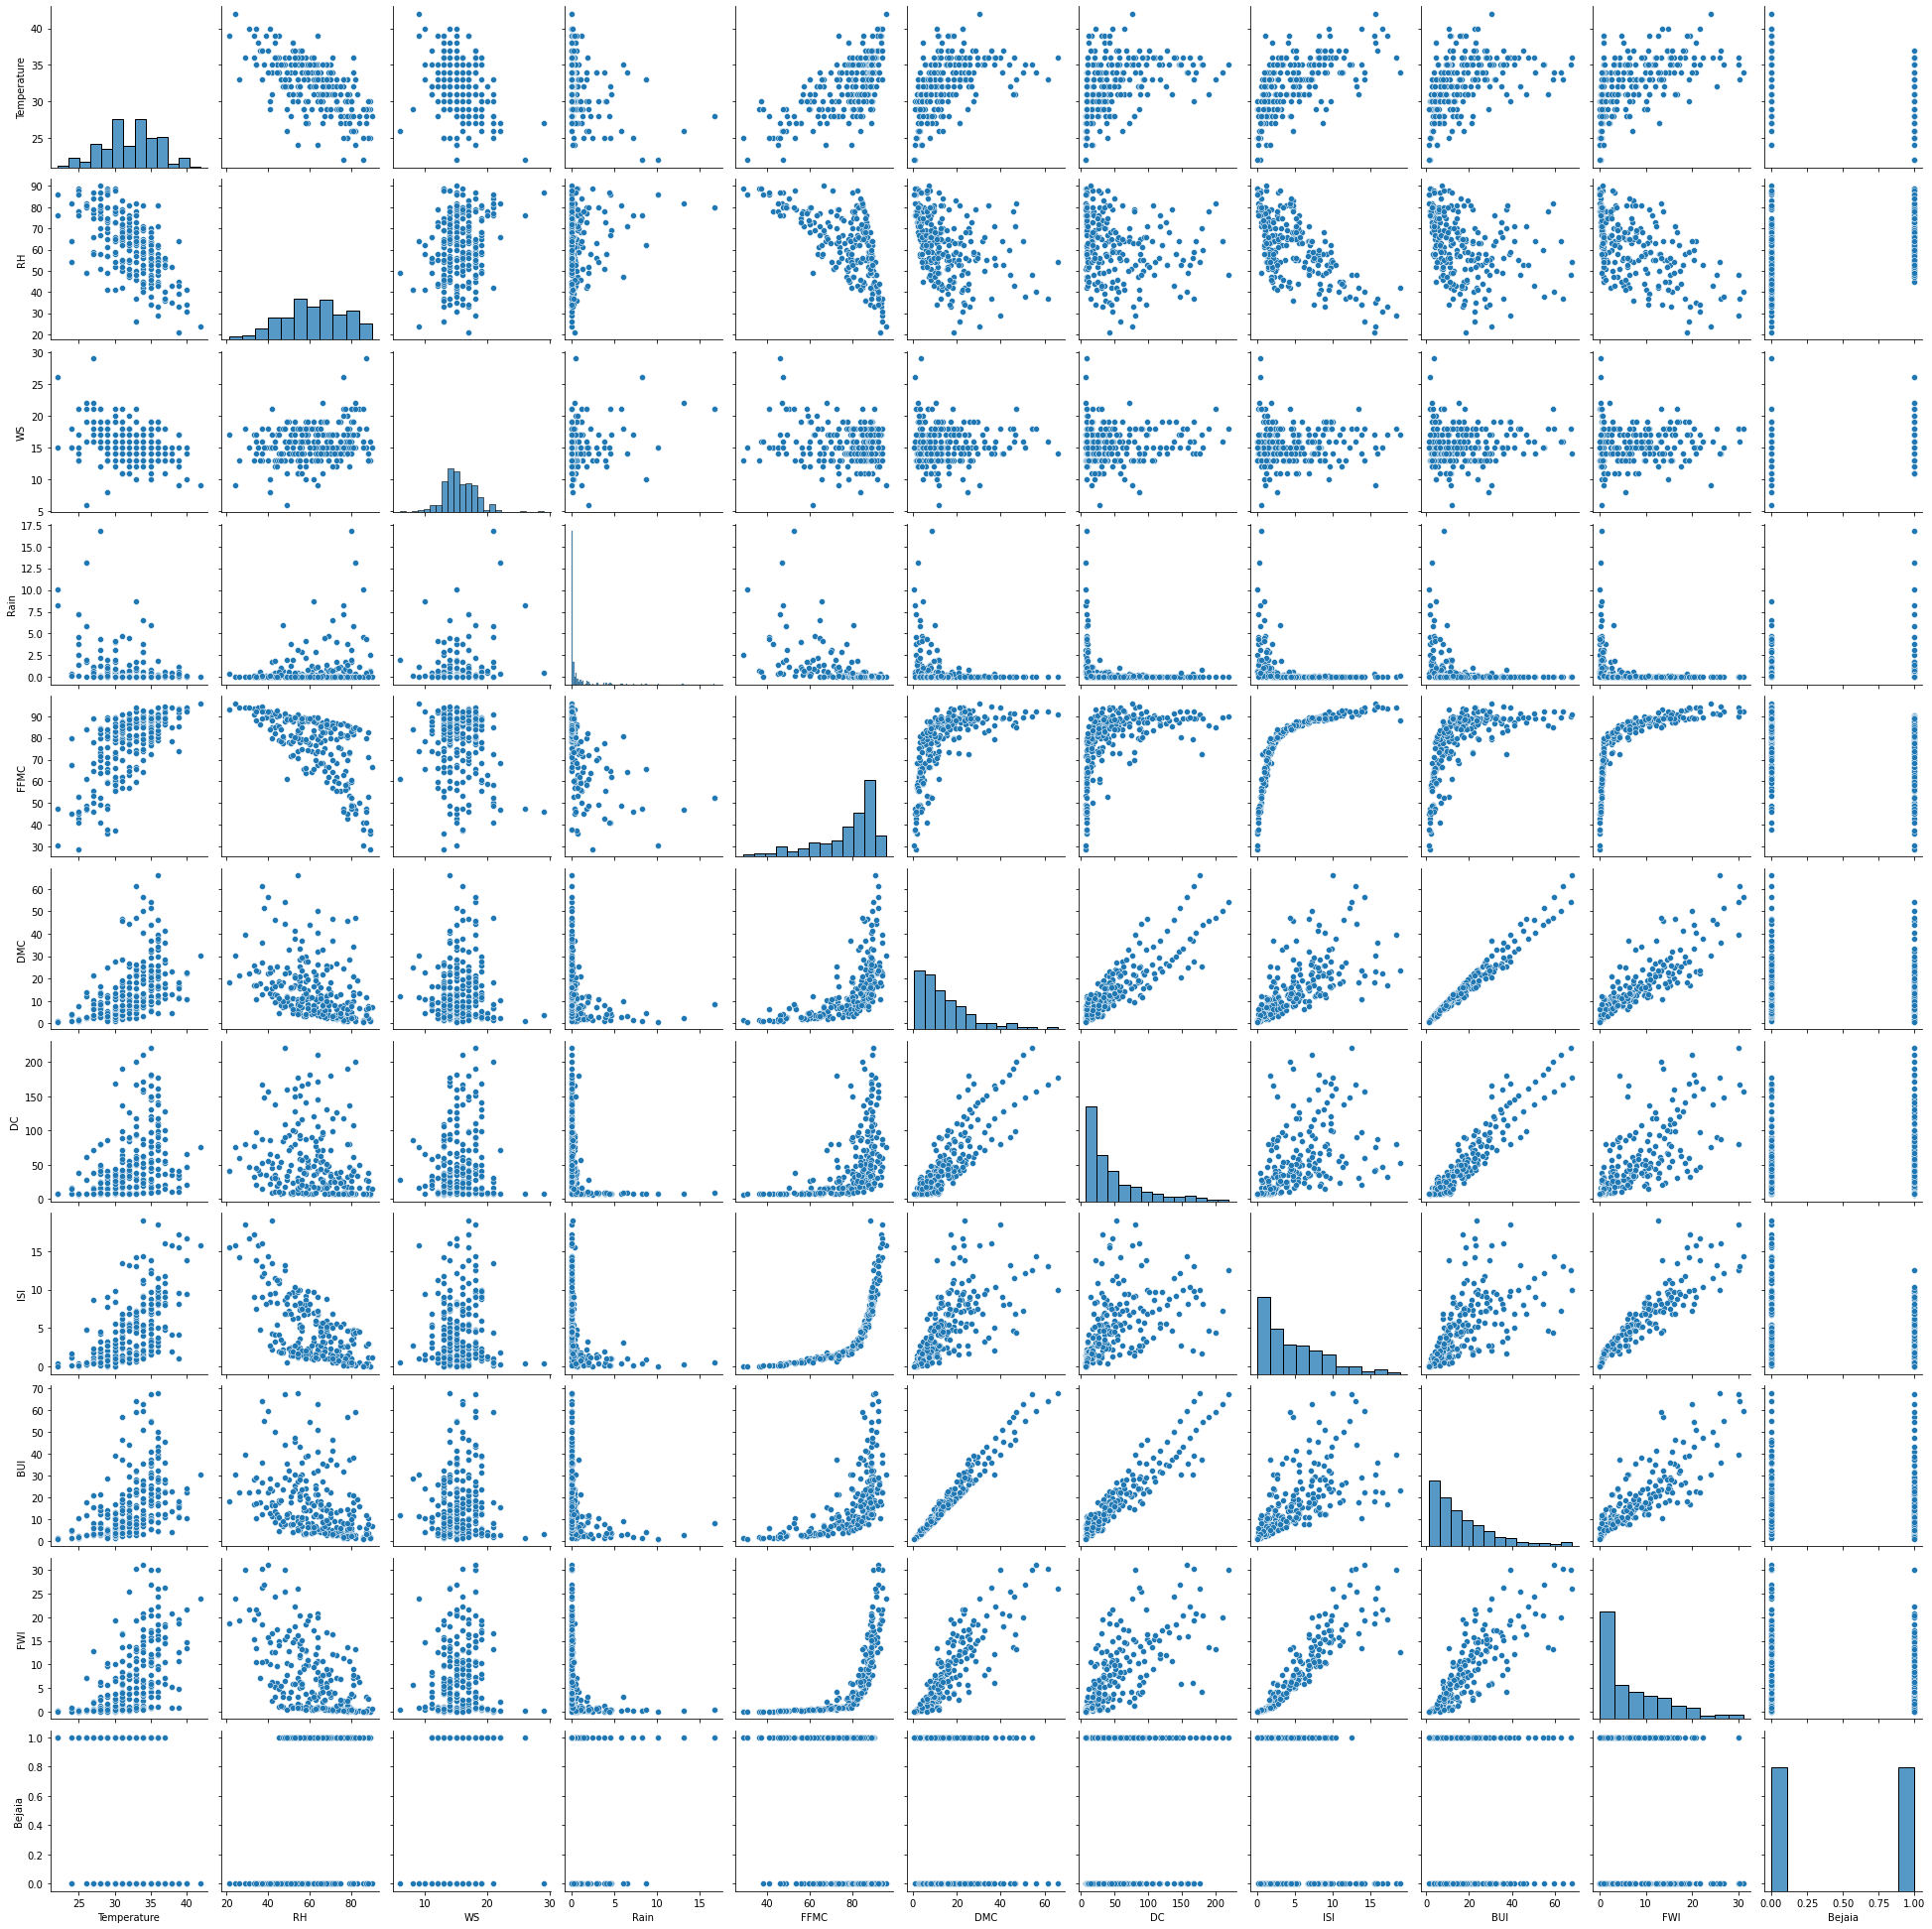

In [17]:
# Visualize the relationship between the variables using a scatterplot.
sns.pairplot(final_df)

Multicollinearity is evident between several of the explanatory variables.  VIF will be checked in the next section.

# **LINEAR REGRESSION ANALYSIS**

Equation for linear regression.<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first column or variable.
-  $m_n$ is the coefficient for the nth column or variable.<br>

## **1.Assign predictor and response variables.**

In [18]:
# Assign independent (predictor) variables to X
X = final_df[['Temperature','RH','WS','Rain','FFMC','DMC','DC','ISI','BUI','Bejaia']]

# Print the head of X.
X.head()

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,Bejaia
0,34,42,15,1.7,79.7,12.0,8.5,2.2,11.5,0.0
1,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.0
2,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,1.0
3,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,1.0
4,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,1.0


In [19]:
# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculate VIF for each feature used in the regression.
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Temperature,97.762354
1,RH,32.377768
2,WS,34.607674
3,Rain,1.648579
4,FFMC,95.071560
5,DMC,199.783339
6,DC,50.955158
7,ISI,8.952870
8,BUI,385.145768
9,Bejaia,3.200578


Temperature, RH, Ws, FFMC, DMC, DC, ISI, and BUI have severe multicollinearity with other predictors in the model as their VIFs are greater than five.  Therefore, the coefficient estimates and p-values may be unreliable.  Rain and Bejaia have moderate multicollinearity with other predictors in the model as their VIFs are between one and five.  However, if the main goal of the regression is to make predictions, multicollinearity does not need to be corrected since it does not impact predictions or goodness-of-fit.

In [20]:
# Assign dependent (response) variable to y.
y = final_df['FWI']

# Print the head of y.
y.head()

0    2.2
1    0.5
2    0.5
3    0.4
4    0.1
Name: FWI, dtype: float64

## **2. Split the data into training and test sets.**

In [21]:
# The random_state is the seed used by the random number generator. Use any integer for the value.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [22]:
# Note that the data is split 70:30 based on training size specified above.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(170, 10)
(170,)
(74, 10)
(74,)


In [23]:
X_train

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,Bejaia
189,31,71,17,0.0,87.3,46.6,99.0,6.9,46.5,0.0
145,37,52,18,0.0,89.3,16.0,100.7,9.7,22.9,1.0
74,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.0
234,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,0.0
198,37,56,11,0.0,87.4,11.2,20.2,5.2,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...
87,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.0
103,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,1.0
67,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.0
24,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,1.0


## **3. Create Linear Regression Model**



In [24]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create linear regression object.
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## **4. Calculate Coefficients.**

In [25]:
# Print the intercept and coefficients.
print(lr.intercept_)
print(lr.coef_)

0.37998861247583093
[ 0.01217398 -0.00154041 -0.00920889  0.01070793 -0.04400714  0.0228704
 -0.01159676  1.16765035  0.26821824  0.2009996 ]


The model does not include interactions between variables.

FWI = .38 + .012*Temperature - .001*RH - .0002*WS - .0009*Rain - .044*FFMC + .02*DMC - .012*DC + 1.17*ISI + .268*BUI + .20*Bejaia

This equation will be used to predict FWI.

## **5. Make Predictions Using Test Set.**

In [26]:
# Making predictions on the testing set.
# Assign results to y_pred
y_pred = lr.predict(X_test)

In [27]:
type(y_pred)

numpy.ndarray

## **6. Compute Root Mean Square Error (RMSE) and R-Squared.**

Text(0, 0.5, 'FWI')

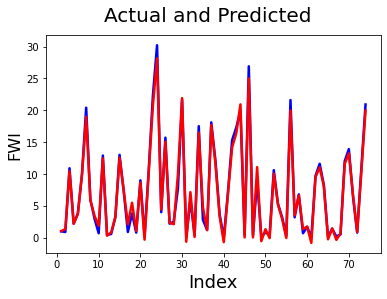

In [28]:
# Actual vs Predicted
import matplotlib.pyplot as plt
# Generate index.
c = [i for i in range(1,75,1)]        
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                              
plt.ylabel('FWI', fontsize=16)                    

Text(0, 0.5, 'ytest-ypred')

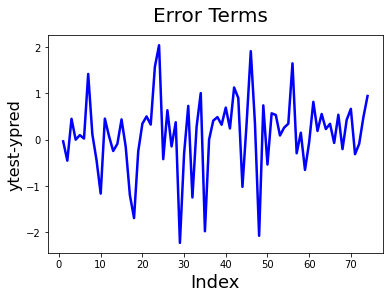

In [29]:
# Visualize error terms (difference between expected and actual values.)
c = [i for i in range(1,75,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [30]:
# Calculate RMSE -the standard deviation of residuals (distance from data point to regression line).
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [31]:
# Calculate R-Squared - a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.
r_squared = r2_score(y_test, y_pred)

In [32]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.6695682462266105
r_square_value : 0.9880613767251051


Text(0, 0.5, 'Predicted Y')

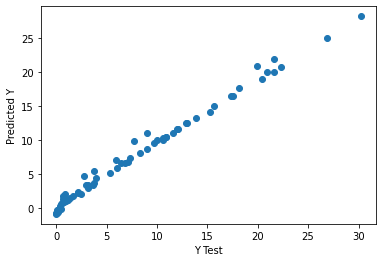

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# **REPORT OF FINDINGS & INSIGHTS**





**Statistical Findings**

* The MSE value tells you how close a regression line is to a set of points. In this case, the MSE of .67 means that the model has .67% error in it.

* The R-Squared value of 0.99 means that the model explains 99 percent of the fitted data in the regression model.

**Insight and Conclusion**
Given the results, the selected predictors may be able to predict FWI. However, one or more variables could be removed to simplify the model and resolve collinearity.